In [2]:
import nltk


In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

### Tokenize

In [10]:
from nltk.tokenize import word_tokenize
input = 'I am a new learner of NLTK'
word_t = nltk.word_tokenize(input)
print(input)
print(word_t)

I am a new learner of NLTK
['I', 'am', 'a', 'new', 'learner', 'of', 'NLTK']


In [14]:
data = open('SMSSpamCollection').read()
data[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [16]:
p_data = data.replace('\t', '\n').split('\n')
p_data

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'spam',
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam',
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! 

In [19]:
lbl_list = p_data[0::2]
msg_list = p_data[1::2]
print(lbl_list[0:5])
print(msg_list[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [23]:
import pandas as pd
combined_df = pd.DataFrame({
    'Label'  : lbl_list[:-1],
    'SMS' : msg_list
}) 
combined_df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### OTHER WAY....

In [26]:
dataset= pd.read_csv('SMSSpamCollection', sep='\t', header=None)
dataset[0:5]

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
dataset.columns=['Label', 'SMS']
dataset.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
print(f'Rows:{dataset.shape}:Columns')

Rows:(5572, 2):Columns


In [36]:
count= dataset.Label[dataset.Label=='ham'].count()
count

4825

In [38]:
count= dataset.Label[dataset.Label=='spam'].count()
count

747

##### ........................................

#### Missing Data check

In [44]:
print(f"Missing Data: Label:{dataset['Label'].isnull().sum()}")
print(f"Missing Data: SMS:{dataset['SMS'].isnull().sum()}")

Missing Data: Label:0
Missing Data: SMS:0


In [47]:
pd.set_option('display.max_colwidth',200)
data=pd.read_csv('SMSSpamCollection', sep='\t', header=None)
data.columns=['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#### Remove punctuation

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def rm_punc(txt):
    txt_nopunc = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunc

In [60]:
data['msg_clean']= data['msg'].apply(lambda x: rm_punc(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


#### Tokenize

In [66]:
import re

def tokenize(txt):
    token = re.split('\W+', txt)
    return token
                   
data['msg_clean_tokenized'] = data['msg_clean'].apply(lambda x: tokenize(x.lower()))
data.head()            

,label,msg,msg_clean,msg_clean_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


#### Rm StopWords

In [70]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [74]:
def remove_stopwords(txt):
    txt_t= [word for word in txt if word not in stop_words]
    return txt_t
    
data['msg_no_sw']=data['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()
    

,label,msg,msg_clean,msg_clean_tokenized,msg_no_sw
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


## Stemming

In [77]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [80]:
print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))
print(ps.stem('date'))
print(ps.stem('dates'))

univers
univers
univers
date
date


In [17]:
import nltk
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)

stop_words = nltk.corpus.stopwords.words('english')

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None)
data.columns=['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [18]:
def clean_txt(txt):
    text="".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',text)
    texts=[word for word in tokens if word not in stop_words]
    return texts    

In [4]:
data['msg_nostop']=data['msg'].apply(lambda x: clean_txt(x.lower()))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [7]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [ ]:
data['msg_stemmed'] = data['msg_nostop'].apply(lambda x: stemming(x))
data.head()

### CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = ['This is a sentence is',
         'This is another sentence',
         'third document is here']

X = cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

X = cv.transform(corpus)
X = cv.fit_transform(corpus)
print(X.shape)
print('-----------------------------')
print(X)
print(X.toarray())
print('---------------------------------')

df= pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
(3, 7)
-----------------------------
  (0, 4)	1
  (0, 3)	2
  (0, 6)	1
  (1, 0)	1
  (1, 4)	1
  (1, 3)	1
  (1, 6)	1
  (2, 2)	1
  (2, 1)	1
  (2, 5)	1
  (2, 3)	1
[[0 0 0 2 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 1 1 0 1 0]]
---------------------------------
   another  document  here  is  sentence  third  this
0        0         0     0   2         1      0     1
1        1         0     0   1         1      0     1
2        0         1     1   1         0      1     0


##### On SMSSpamCollection

In [23]:
cv1 = CountVectorizer(analyzer = clean_txt)
X = cv1.fit_transform(data['msg'])
print(X.shape)

(5572, 11525)


In [24]:
print(cv1.get_feature_names())

['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796XXXXXX', '07973788240', '07XXXXXXXXX', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '0870062117015

In [25]:
sample= data[0:10]
cv2 = CountVectorizer(analyzer = clean_txt)
X = cv2.fit_transform(data['msg'])
print(X.shape)


(5572, 11525)


In [27]:
df = pd.DataFrame(X.toarray(), columns = cv2.get_feature_names())
df.head(10)

,,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,...,zeros,zhong,zoom,zyada,Ü,Üll,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### WordNetLemmatizer

In [100]:
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [104]:
print(wn.lemmatize('universe'))
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))

print('------------------')
print(ps.stem('universe'))
print(ps.stem('universal'))
print(ps.stem('university'))

universe
universal
university
------------------
univers
univers
univers


In [28]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)

stop_words = nltk.corpus.stopwords.words('english')

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None)
data.columns=['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [107]:
def clean_txt(txt):
    text="".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',text)
    texts=[word for word in tokens if word not in stop_words]
    return texts    

In [110]:
data['msg_nostop'] = data['msg'].apply(lambda x: clean_txt(x))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"


### Lemmatize

In [112]:
def lemmatize(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [113]:
data['msg_lemmatized'] = data['msg_nostop'].apply(lambda x: lemmatize(x))
data.head()

,label,msg,msg_nostop,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[Nah, I, dont, think, go, usf, life, around, though]"


### N-Gram 

In [30]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)

stop_words = nltk.corpus.stopwords.words('english')

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None)
data.columns=['label', 'msg']


In [32]:
def clean_txt(txt):
    text="".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',text)
    texts=" ".join([word for word in tokens if word not in stop_words])
    return texts    

In [34]:
data['msg_clean'] = data['msg'].apply(lambda x: clean_txt(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questions...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think goes usf lives around though


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,3))

corpus = ['This is a sentence is',
         'This is another sentence',
         'third document is here']

# X = cv.fit(corpus)
# print(cv.get_feature_names())

# X = cv.transform(corpus)
X = cv.fit_transform(corpus)
# print(X.vocabulary_)

print(X.shape)
# ?print('-----------------------------')
# print(X)
print(X.toarray())
print('---------------------------------')

df= pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

(3, 14)
[[0 0 0 0 0 0 1 1 1 0 0 1 0 1]
 [1 0 0 1 1 0 0 0 0 0 0 1 1 0]
 [0 1 1 0 0 1 0 0 0 1 1 0 0 0]]
---------------------------------
   another sentence  document is  document is here  is another  \
0                 0            0                 0           0   
1                 1            0                 0           1   
2                 0            1                 1           0   

   is another sentence  is here  is sentence  is sentence is  sentence is  \
0                    0        0            1               1            1   
1                    1        0            0               0            0   
2                    0        1            0               0            0   

   third document  third document is  this is  this is another  \
0               0                  0        1                0   
1               0                  0        1                1   
2               1                  1        0                0   

   this is sentence  
0  

In [44]:
sample= data[0:10]
cv2 = CountVectorizer(ngram_range=(2,2))
X = cv2.fit_transform(sample['msg_clean'])
print(X.shape)

(10, 126)


In [51]:
df= pd.DataFrame(X.toarray(), columns = cv2.get_feature_names())
print(df.head(10))

   09061701461 claim  11 months  12 hours  150 rcv  2005 text  21st may  \
0                  0          0         0        0          0         0   
1                  0          0         0        0          0         0   
2                  0          0         0        0          1         1   
3                  0          0         0        0          0         0   
4                  0          0         0        0          0         0   
5                  0          0         0        1          0         0   
6                  0          0         0        0          0         0   
7                  0          0         0        0          0         0   
8                  1          0         1        0          0         0   
9                  0          1         0        0          0         0   

   87121 receive  900 prize  aids patent  already say  ...  valued network  \
0              0          0            0            0  ...               0   
1              0  

### TF-IDF Vectorizer

In [54]:
import nltk

ps = nltk.PorterStemmer()

stop_words = nltk.corpus.stopwords.words('english')

data=pd.read_csv('SMSSpamCollection', sep='\t', header=None)
data.columns=['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [55]:
def clean_txt(txt):
    text="".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',text)
    texts= (ps.stem(word) for word in tokens if word not in stop_words)
    return texts    

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

corpus = ['This is a sentence is',
         'This is another sentence',
         'third document is here']

X = tfidf_vect.fit(corpus)
print(X.vocabulary_)
print(tfidf_vect.get_feature_names())

X = tfidf_vect.transform(corpus)
# X = tfidf_vect.fit_transform(corpus)

print(X.shape)
# ?print('-----------------------------')
# print(X)
print(X.toarray())
print('---------------------------------')

df= pd.DataFrame(X.toarray(), columns = tfidf_vect.get_feature_names())
print(df)

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
(3, 7)
[[0.         0.         0.         0.73941068 0.47606294 0.
  0.47606294]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.
  0.4804584 ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.54645401
  0.        ]]
---------------------------------
    another  document      here        is  sentence     third      this
0  0.000000  0.000000  0.000000  0.739411  0.476063  0.000000  0.476063
1  0.631745  0.000000  0.000000  0.373119  0.480458  0.000000  0.480458
2  0.000000  0.546454  0.546454  0.322745  0.000000  0.546454  0.000000


In [59]:
sample= data[0:10]
tfidf2 = TfidfVectorizer(analyzer= clean_txt)
X = tfidf2.fit_transform(sample['msg'])
print(X.shape)

(10, 131)


In [63]:
df= pd.DataFrame(X.toarray(), columns = tfidf2.get_feature_names())
print(df.head(10))

   08002986030  08452810075over18  09061701461        11       12       150  \
0     0.000000           0.000000      0.00000  0.000000  0.00000  0.000000   
1     0.000000           0.000000      0.00000  0.000000  0.00000  0.000000   
2     0.000000           0.193446      0.00000  0.000000  0.00000  0.000000   
3     0.000000           0.000000      0.00000  0.000000  0.00000  0.000000   
4     0.000000           0.000000      0.00000  0.000000  0.00000  0.000000   
5     0.000000           0.000000      0.00000  0.000000  0.00000  0.231109   
6     0.000000           0.000000      0.00000  0.000000  0.00000  0.000000   
7     0.000000           0.000000      0.00000  0.000000  0.00000  0.000000   
8     0.000000           0.000000      0.21594  0.000000  0.21594  0.000000   
9     0.187859           0.000000      0.00000  0.187859  0.00000  0.000000   

          2      2005      21st         3  ...    vettam   wat      week  \
0  0.000000  0.000000  0.000000  0.000000  ...  0.0000

### Creating feature - msg len

In [66]:
data['msg_len'] = data['msg'].apply(lambda x: len(x))
data.head(10)

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,147
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,160
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,157
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,154


### create feature - punctuation usage

In [88]:
def punc_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['punc_%'] = data['msg'].apply(lambda x: punc_count(x))
data.head(10)

,label,msg,msg_len,punc_count,punc_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111,8.108108,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,3.870968,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,3.278689,3.278689
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,147,5.442177,5.442177
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,2.597403,2.597403
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,160,3.750000,3.750000
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,157,3.821656,3.821656
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,154,1.298701,1.298701


### Plotting msg len for spam and ham

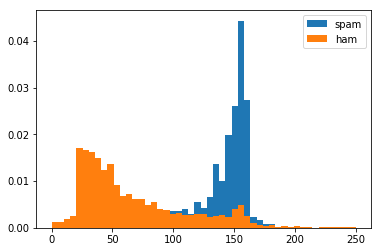

In [89]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

bins = np.linspace(0, 250, 50)
pyplot.hist(data[data['label'] == 'spam']['msg_len'], bins, label = 'spam', normed=True)
pyplot.hist(data[data['label'] == 'ham']['msg_len'], bins, label = 'ham', normed=True)
pyplot.legend(loc='upper right')
pyplot.show()

### evaluating puntuation %

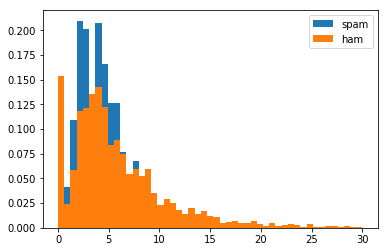

In [91]:
bins = np.linspace(0, 30, 50)
pyplot.hist(data[data['label'] == 'spam']['punc_%'], bins, label = 'spam', normed=True)
pyplot.hist(data[data['label'] == 'ham']['punc_%'], bins, label = 'ham', normed=True)
pyplot.legend(loc='upper right')
pyplot.show()

### plot the new features

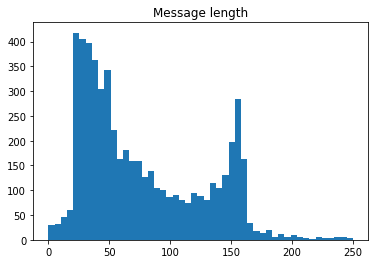

In [83]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

bins = np.linspace(0, 250, 50)
pyplot.hist(data['msg_len'], bins)
pyplot.title('Message length')
pyplot.show()

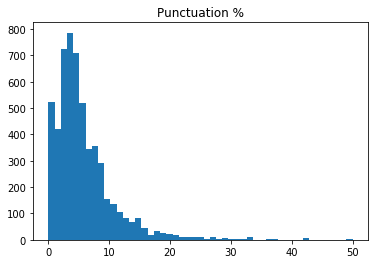

In [90]:
bins = np.linspace(0, 50, 50)
pyplot.hist(data['punc_%'], bins)
pyplot.title('Punctuation %')
pyplot.show()

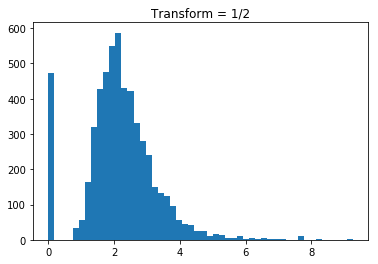

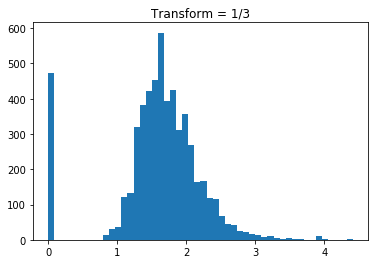

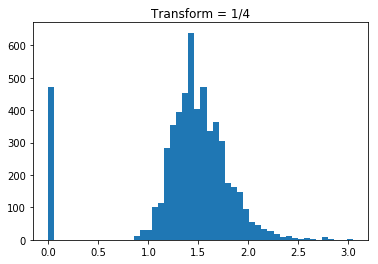

In [94]:
for i in [2,3,4]:
    pyplot.hist((data['punc_%'])**(1/i), bins=50)
    pyplot.title(f'Transform = 1/{i}')
    pyplot.show()